# Aula Prática 04

## Objetivos desta aula:

    - Fourier
    - Filtragem no domnínio da frequência


## Yuri Diego Santos Niitsuma - 2011039023

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
from scipy import ndimage
import matplotlib.colors as colors

import skimage
from skimage import color
from skimage import draw
from skimage import filters
from skimage.morphology import disk

%matplotlib inline

# Funcao para plotar uma imagem qualquer
def show(img, figsize=(8, 8)):
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    ax.imshow(img, cmap=plt.cm.gray)
    ax.set_axis_off()
    plt.show()
    
    
def plot_both(img, freq):
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharey=True)
    
    ax1.imshow(img, norm=colors.Normalize())
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax2.imshow(np.fft.fftshift(np.abs(freq)), norm=colors.LogNorm(vmin=5))
    ax2.set_xticks([])
    ax2.set_yticks([])
    
    plt.show()
    
    
def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()
    
def plot_fft(img, title='Fourier transform'):
    im_fft = fftpack.fft2(img)
    plt.figure()
    plot_spectrum(im_fft)
    plt.title(title)

def plot_dct(img, title='Cos transform'):
    im_dct = fftpack.dct(img)
    plt.figure()
    plot_spectrum(im_dct)
    plt.title(title)

In [2]:
def define_filter(size, shape, filter_type, rotation, *args):
    
    f_filter = np.zeros(size, dtype=np.int)
    coordinates = []
    
    if shape == 'circle':
        
        coordinates = draw.circle(size[0] / 2, size[1] / 2, *args) #radius)
    elif shape == 'ellipse':
        
        coordinates = draw.ellipse(size[0] / 2, size[1] / 2, *args, rotation=rotation) #rad1, rad2, rotation)
    
    f_filter[coordinates] = 1
    f_filter = np.fft.ifftshift(f_filter)

    if filter_type == 'highpass':
        
        f_filter = 1 - f_filter # Invert mask.
    elif filter_type == 'lowpass':
        
        pass
    
    else:
        
        print('Filter Type not recognized')
    
    return f_filter

### Escolha uma imagem em escala de cinza e ruído. Escreva o código para carregar e mostrar a imagem.

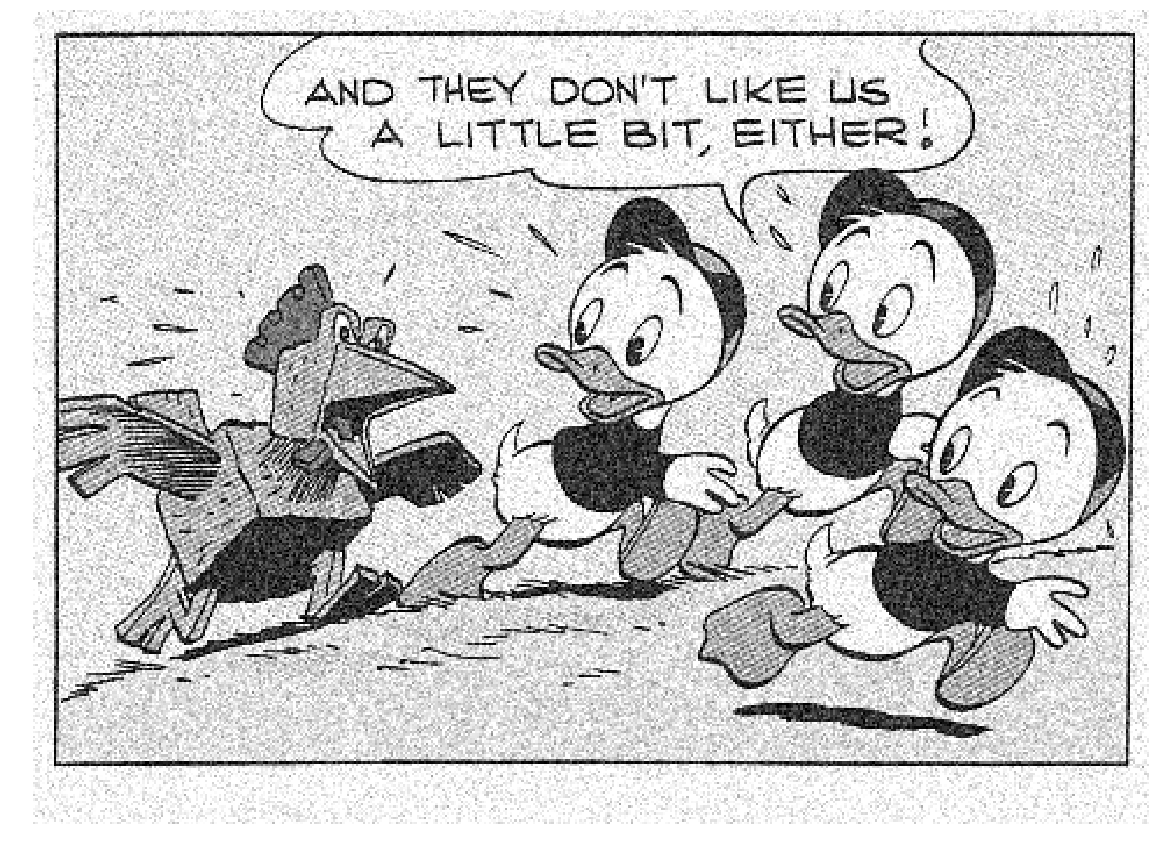

In [3]:
img = plt.imread('hug_zez_lui.png').astype(float)
img = color.rgb2grey(img)

# Aplicando ruído gaussiano
img = skimage.util.random_noise(img, mode='gaussian', seed=None, clip=True)
show(img, (20,20))


### Escreva o código e mostre a imagem no domínio da frequência.

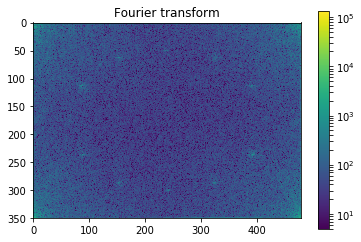

In [4]:
plot_fft(img)

### Escreva o código e mostre uma das imagens filtrada utilizando a transformada de Fourier.

In [5]:
# Função para aplicar o filtro
def apply_filter(img, f_filter):
    # Compute FFT of image.
    f_signal = fftpack.fft2(img)

    # Creating Filter on Frequency Domain.
    
    f_filter = f_filter.astype(np.float)

    # Mitigating Gibbs Phenomenon.
    f_filter = filters.gaussian(f_filter, sigma=5)

    # Pointwise multiplication.
    f_result = f_signal * f_filter
    f_result[f_filter == 0] = f_result[f_filter == 0] + 0.0001 # For plotting purposes.

    # Inverse FFT of frequency image.
    f_conv = np.real(fftpack.ifft2(f_result))
    
    return f_conv, f_signal, f_filter, f_result

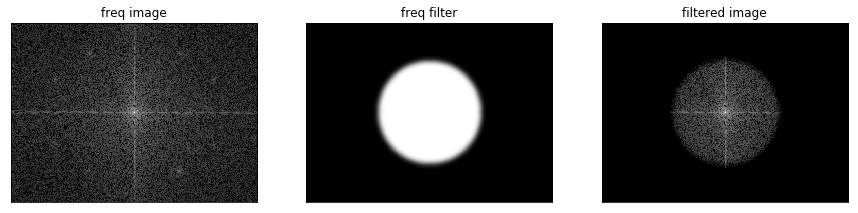

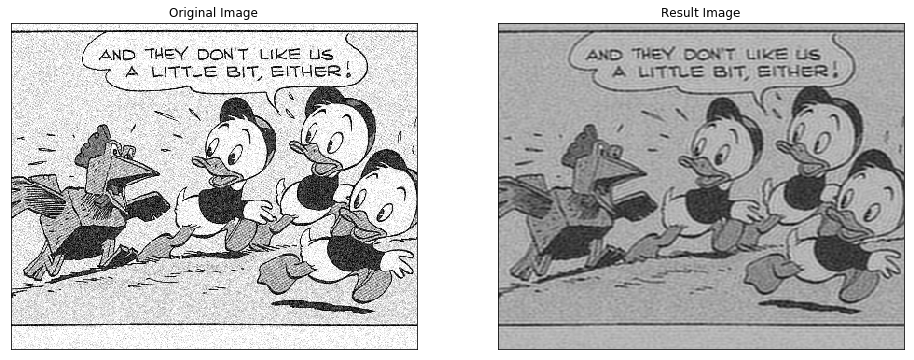

In [6]:
# Aplicando suavização com um filtro de passa-baixa
f_filter = define_filter(img.shape, 'circle', 'lowpass', 0.0, 100)
f_conv, f_signal, f_filter, f_result = apply_filter(img, f_filter)

# Plotting.
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.imshow(np.abs(np.real(np.fft.fftshift(f_signal))), cmap=plt.cm.gray, norm=colors.LogNorm(vmin=5))
ax1.set_title('freq image')
ax1.set_xticks([])
ax1.set_yticks([])
ax2.imshow(np.abs(np.fft.fftshift(f_filter)), cmap=plt.cm.gray)
ax2.set_title('freq filter')
ax2.set_xticks([])
ax2.set_yticks([])
ax3.imshow(np.abs(np.real(np.fft.fftshift(f_result))), cmap=plt.cm.gray, norm=colors.LogNorm(vmin=5))
ax3.set_title('filtered image')
ax3.set_xticks([])
ax3.set_yticks([])

plt.show()

# Plotting.
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

ax1.imshow(img, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.set_xticks([])
ax1.set_yticks([])
ax2.imshow(f_conv, cmap=plt.cm.gray)
ax2.set_title('Result Image')
ax2.set_xticks([])
ax2.set_yticks([])
plt.show()

### Dada a imagem stp1.gif faça:
#### Aplique o filtro um filtro passa alta (i.e. sobel, prewitt ou laplace) na stp1 e compare os resultados da transformada de Fourier antes e depois da aplicação do filtro.

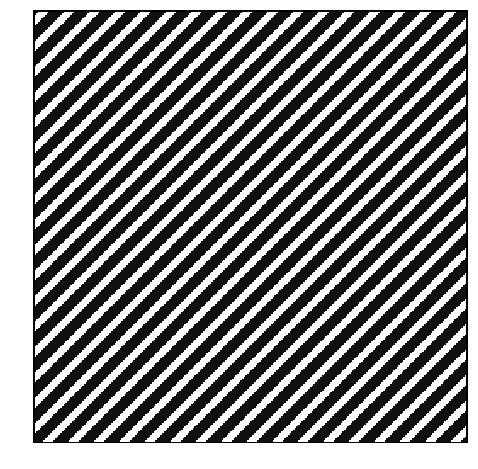

In [7]:
# Carregando imagem
stp1 = plt.imread('stp1.gif').astype(float)
stp1 = color.rgb2grey(stp1)
show(stp1)

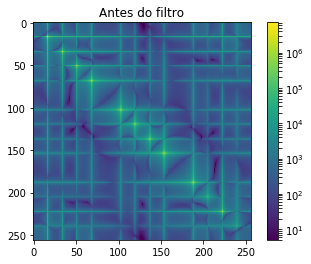

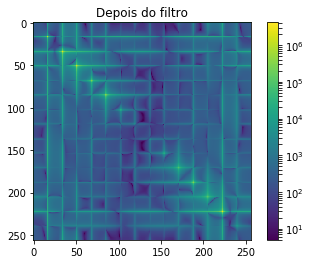

In [8]:
# Aplicando filtro sobel
img_sobel = skimage.filters.sobel(stp1)

plot_fft(stp1, 'Antes do filtro')
plot_fft(img_sobel, 'Depois do filtro')


### Dada a imagem stp2.gif faça:
#### Aplique o filtro da média na stp2 e compare os resultados da transformada de Fourier antes e depois da aplicação do filtro.

/home/yuri/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


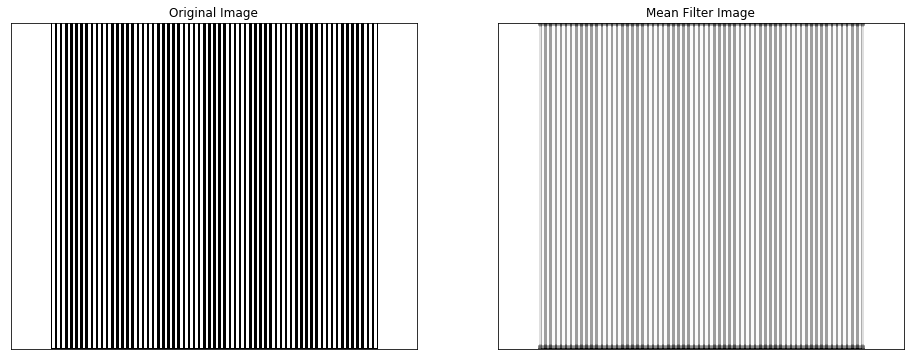

In [9]:
# Carregando imagem
stp2 = plt.imread('stp2.gif').astype(float)
stp2 = color.rgb2grey(stp2)

# Aplicar o filtro da média
img_mean = skimage.filters.rank.mean(skimage.img_as_ubyte(stp2/256), disk(3))

# Plotting.
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

ax1.imshow(stp2, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.set_xticks([])
ax1.set_yticks([])
ax2.imshow(img_mean, cmap=plt.cm.gray)
ax2.set_title('Mean Filter Image')
ax2.set_xticks([])
ax2.set_yticks([])
plt.show()

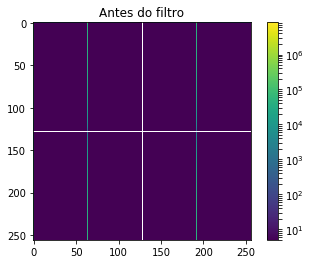

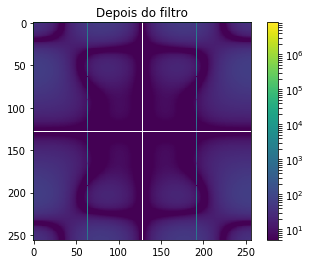

In [10]:
plot_fft(stp2, 'Antes do filtro')
plot_fft(img_mean, 'Depois do filtro')

#### Compare os espectros da DFT(fft) e DCT da imagem escolhida.

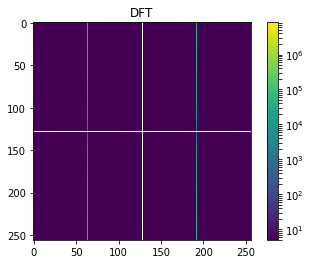

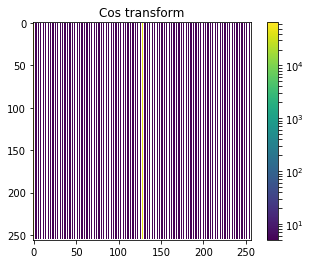

In [11]:
plot_fft(stp2, 'DFT')
plot_dct(stp2)

[]

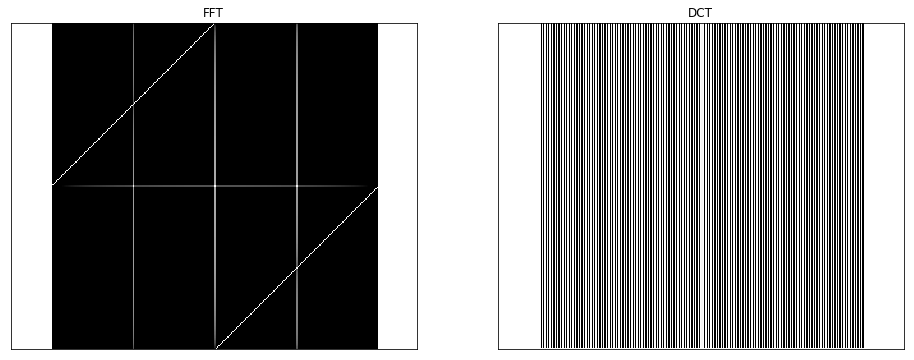

In [12]:
im_fft = fftpack.fft2(stp2)
im_dct = fftpack.dct(stp2)

# plt.figure()
# plot_spectrum(im_fft)
# plt.title(title)



#     plot_spectrum(im_dct)
#     plt.title(title)
    
# Plotting.
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

ax1.imshow(np.abs(np.real(np.fft.fftshift(im_fft))), cmap=plt.cm.gray, norm=colors.LogNorm(vmin=5))
ax1.set_title('FFT')
ax1.set_xticks([])
ax1.set_yticks([])
ax2.imshow(np.abs(np.real(im_dct)), cmap=plt.cm.gray, norm=colors.LogNorm(vmin=5))
ax2.set_title('DCT')
ax2.set_xticks([])
ax2.set_yticks([])